Q- 3. A company wants to predict the sales of its product based on the money spent
on different platforms for marketing. They want you to figure out how they can
spend money on marketing in the future in such a way that they can increase their
profit as much as possible built-in docker and use some library to display that in
frontend Dataset This is the https://www.kaggle.com/datasets/ashydv/advertising-dataset You can use this dataset for this question. Note:
Use only Dask

In [1]:


import numpy as np
import pandas as pd



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Lab: Exploratory Analysis with Linear Regressions

***for this lab I will dataset(Advertising), after searching for linear datasets, I found this dataset will be useful for this lab, it is not linear at the first, but in some point it will start to be linear, so I think its will meets the requirements***

**regression model’s score is shown under text "Score"**

**three conclusions drawn** 

In [2]:
df = pd.read_csv("advertising.csv")
df.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## I will use two columns, TV and Sales, TV will be independant and Sales will be dependant (predict Sales based on the TV)

In [5]:
TV = df["TV"].values
# TV

Sales = df["Sales"].values
# Sales
print(len (Sales),len (TV))

200 200


## Now will see the shape

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

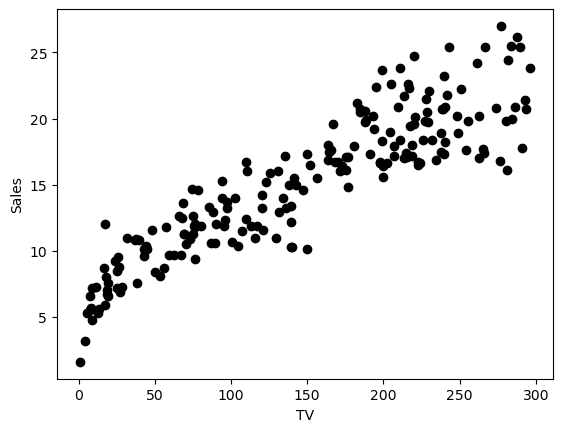

In [6]:
from matplotlib import pyplot as plt
x = TV # x: independent variable
y = Sales # y : dependent variable
plt.scatter(x,y, color='black')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.plot

### It's linear

# **** First conclusions****

### train_size=0.95 // random_state=600

## performs data reshaping, splits the data into training and testing sets, and visualizes the training data as a scatter plot.

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

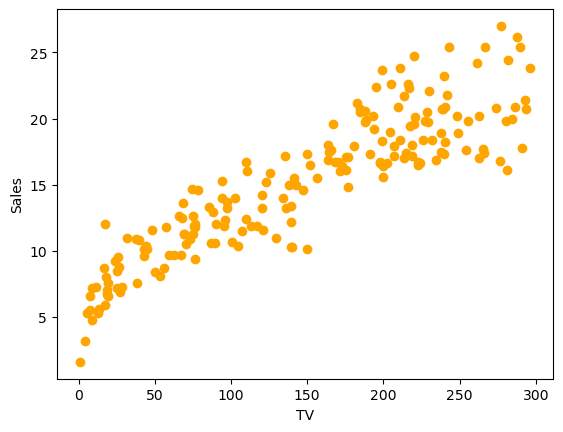

In [24]:
x = x.reshape(-1,1)
len(x)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.95, random_state=600)
#x_train
len(x_train)
#x_test
len(x_test)
plt.scatter(x_train,y_train, color='orange')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.plot


##  creates a linear regression model, fits it to the training data, makes predictions on new input values, and evaluates the model's performance on the testing data using the R-squared score.

# Score

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_predict = lr.predict([[1.1],[2.2]])
y_predict
lr.score(x_test,y_test)* 100

89.9826720569105

In [9]:
y_predict = lr.predict(x_test)
y_predict


array([14.27252519, 22.62905073, 18.8771413 , 11.43933845, 19.57030932,
       20.83011469, 14.23951718,  9.05726105,  7.48938101, 13.40881583])

## visually compare the actual sales data (represented by the red scatter plot) with the predicted sales values (represented by the blue line plot) based on the TV advertising budget. 

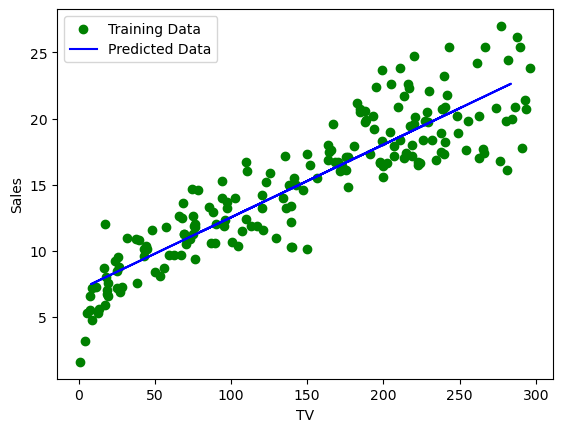

In [19]:
import matplotlib.pyplot as plt

plt.scatter(x_train, y_train, color='green', label='Training Data')
plt.plot(x_test, y_predict, color='blue', label='Predicted Data')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.show()



# **** Second conclusions****

### train_size=0.86 // random_state=300

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

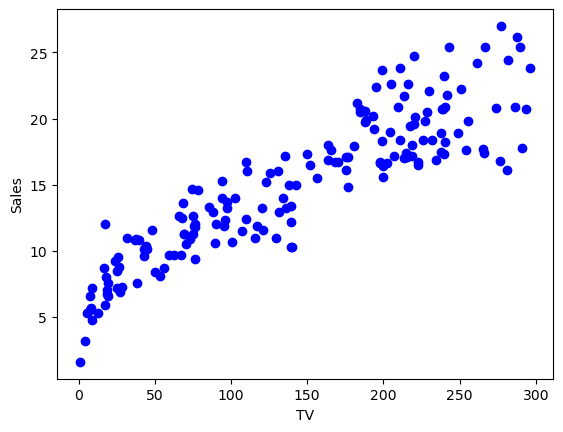

In [20]:
x = x.reshape(-1,1)
len(x)
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x,y,train_size=0.86, random_state=300)
#x2_train
len(x2_train)
#x_test
len(x2_test)
plt.scatter(x2_train,y2_train, color='blue')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.plot


# Score

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x2_train,y2_train)
y2_predict = lr.predict([[1.1],[2.2]])
y2_predict
lr.score(x2_test,y2_test)* 100

78.6309405218317

In [13]:
y2_predict = lr.predict(x2_test)
y2_predict


array([23.41475546, 17.69588075, 16.33076626, 21.71819341, 19.85309871,
       19.76883239, 22.89230423, 12.83652258,  7.61762807, 11.85903319,
       22.93162852, 20.91485443, 10.19055992, 16.6509783 , 13.30279625,
       21.72942892,  7.7018944 , 15.37574789, 16.20155789, 18.58348606,
       22.70130056, 19.13964381, 14.8982387 , 19.54412218, 15.23530401,
       13.72974564, 16.58356524, 11.46579033])

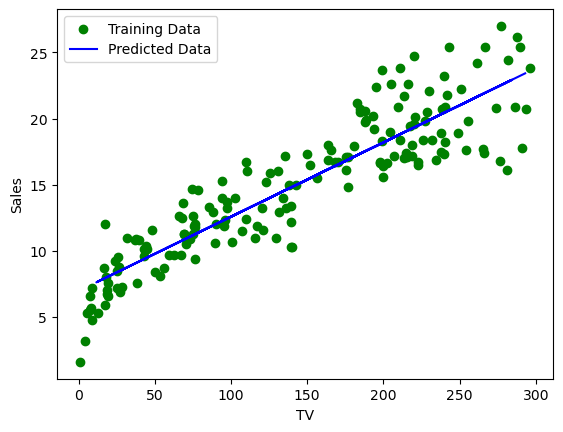

In [21]:
import matplotlib.pyplot as plt

plt.scatter(x2_train, y2_train, color='green', label='Training Data')
plt.plot(x2_test, y2_predict, color='blue', label='Predicted Data')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.show()

# **** third conclusions****

### train_size=0.98 // random_state=200

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

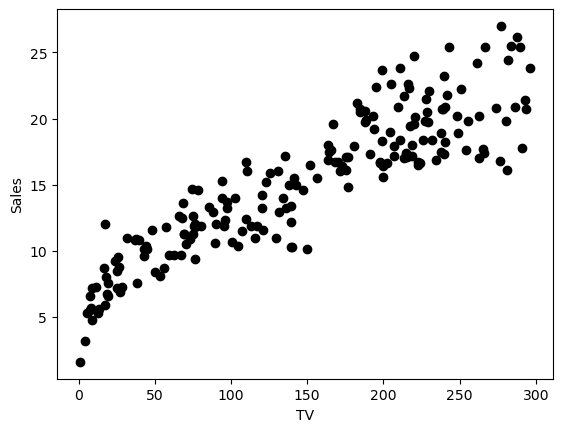

In [22]:
x = x.reshape(-1,1)
len(x)
from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test = train_test_split(x,y,train_size=0.98, random_state=200)
#x3_train
len(x3_train)
#x3_test
len(x3_test)
plt.scatter(x3_train,y3_train, color='black')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.plot

# Score

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x3_train,y3_train)
y3_predict = lr.predict([[1.1],[2.2]])
y3_predict
lr.score(x3_test,y3_test)* 100

86.70280547994568

In [17]:
y3_predict = lr.predict(x3_test)
y3_predict


array([ 8.01754166, 22.77457765, 15.29323285, 11.81935432])

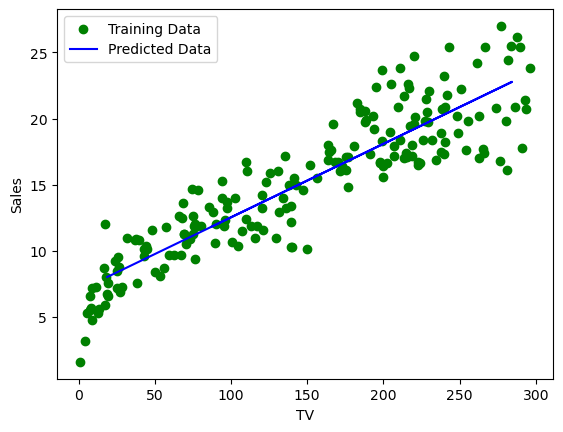

In [23]:
import matplotlib.pyplot as plt

plt.scatter(x3_train, y3_train, color='green', label='Training Data')
plt.plot(x3_test, y3_predict, color='blue', label='Predicted Data')
plt.xlabel("TV")
plt.ylabel("Sales")
plt.legend()
plt.show()